# Contrast reward trials and no-reward control trials

In [1]:
import numpy as np
import pandas as pd
import physutils as phys
import physutils.bootstrap as boot
import physutils.tf as tf
import matplotlib.pyplot as plt
import dbio
from __future__ import division

%matplotlib inline


In [2]:
import os
dbname = os.path.expanduser('data/bart.hdf5')
dtup = 20, 1

In [3]:
lfp = dbio.fetch_all_such_LFP(dbname, *dtup)

Clean up by censoring, zscoring, and taking the mean:


In [4]:
lfpmz = lfp.censor().zscore()
nanrows = np.any(np.isnan(lfpmz), axis=1)
lfpm = lfpmz.mean(axis=1)
lfpm[nanrows] = np.nan
lfpm = phys.LFPset(lfpm)

Grab events:

In [5]:
evt = dbio.fetch_all_such(dbname, 'events', *dtup)

Get stops and pops, plus which ones are control?

In [6]:
stops = evt['banked'].dropna()
pops = evt['popped'].dropna()
starts = evt['start inflating']
if 'is_control' in evt.columns:
    stops_free = evt.query('is_control == False')['banked'].dropna()
    stops_control = evt.query('is_control == True')['banked'].dropna()
    stops_rewarded = evt.query('trial_type != 4')['banked'].dropna()
    stops_unrewarded = evt.query('trial_type == 4')['banked'].dropna()
else:
    stops_free = stops
    stops_rewarded = stops

In [7]:
Tpre = -2
Tpost = 0.5
freqs = np.exp(np.linspace(np.log(2.5), np.log(50)))

## Question: how does the need to voluntarily stop affect power?

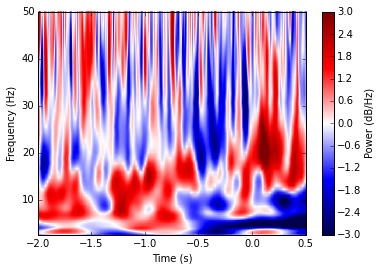

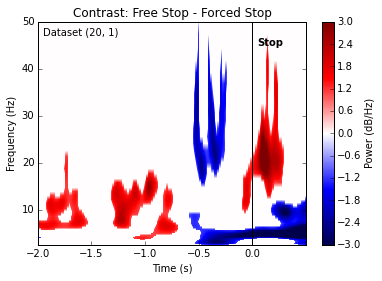

In [8]:
contr_tf, fig = lfpm.contrast_time_frequency(0, [stops_free, stops_control], 
                                             Tpre, Tpost, method='wav',
                                             freqs=freqs, rasterized=True, cmap='seismic', clim=(-3, 3))
mcontr, fig = lfpm.significant_time_frequency(0, [stops_free, stops_control], 
                                             Tpre, Tpost, thresh=(0.1, 0.9), 
                                             freqs=freqs,
                                             niter=100, method='wav', 
                                             doplot=True, rasterized=True, cmap='seismic', clim=(-3, 3))
# decorations
plt.axvline(x=0, color='k')
plt.text(0.05, 45, 'Stop', fontweight='bold')
plt.text(Tpre + 0.05, 47, "Dataset {}".format(str(dtup)))

plt.title('Contrast: Free Stop - Forced Stop')

plt.tick_params(axis='x', which='both', top='off');

## Question: how does the presence of reward affect power?

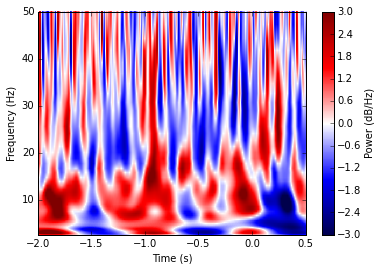

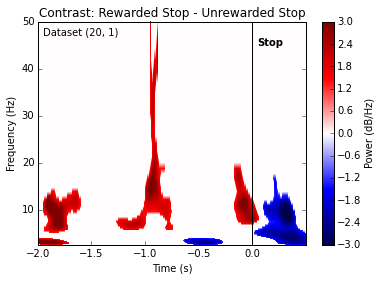

In [9]:
contr_tf, fig = lfpm.contrast_time_frequency(0, [stops_rewarded, stops_unrewarded], 
                                             Tpre, Tpost, method='wav',
                                             freqs=freqs, cmap='seismic', clim=(-3, 3))
mcontr, fig = lfpm.significant_time_frequency(0, [stops_rewarded, stops_unrewarded], 
                                             Tpre, Tpost, thresh=(0.1, 0.9), 
                                             freqs=freqs,
                                             niter=100, method='wav', 
                                             doplot=True, cmap='seismic', clim=(-3, 3))
# decorations
plt.axvline(x=0, color='k')
plt.text(0.05, 45, 'Stop', fontweight='bold')
plt.text(Tpre + 0.05, 47, "Dataset {}".format(str(dtup)))

plt.title('Contrast: Rewarded Stop - Unrewarded Stop')

plt.tick_params(axis='x', which='both', top='off');